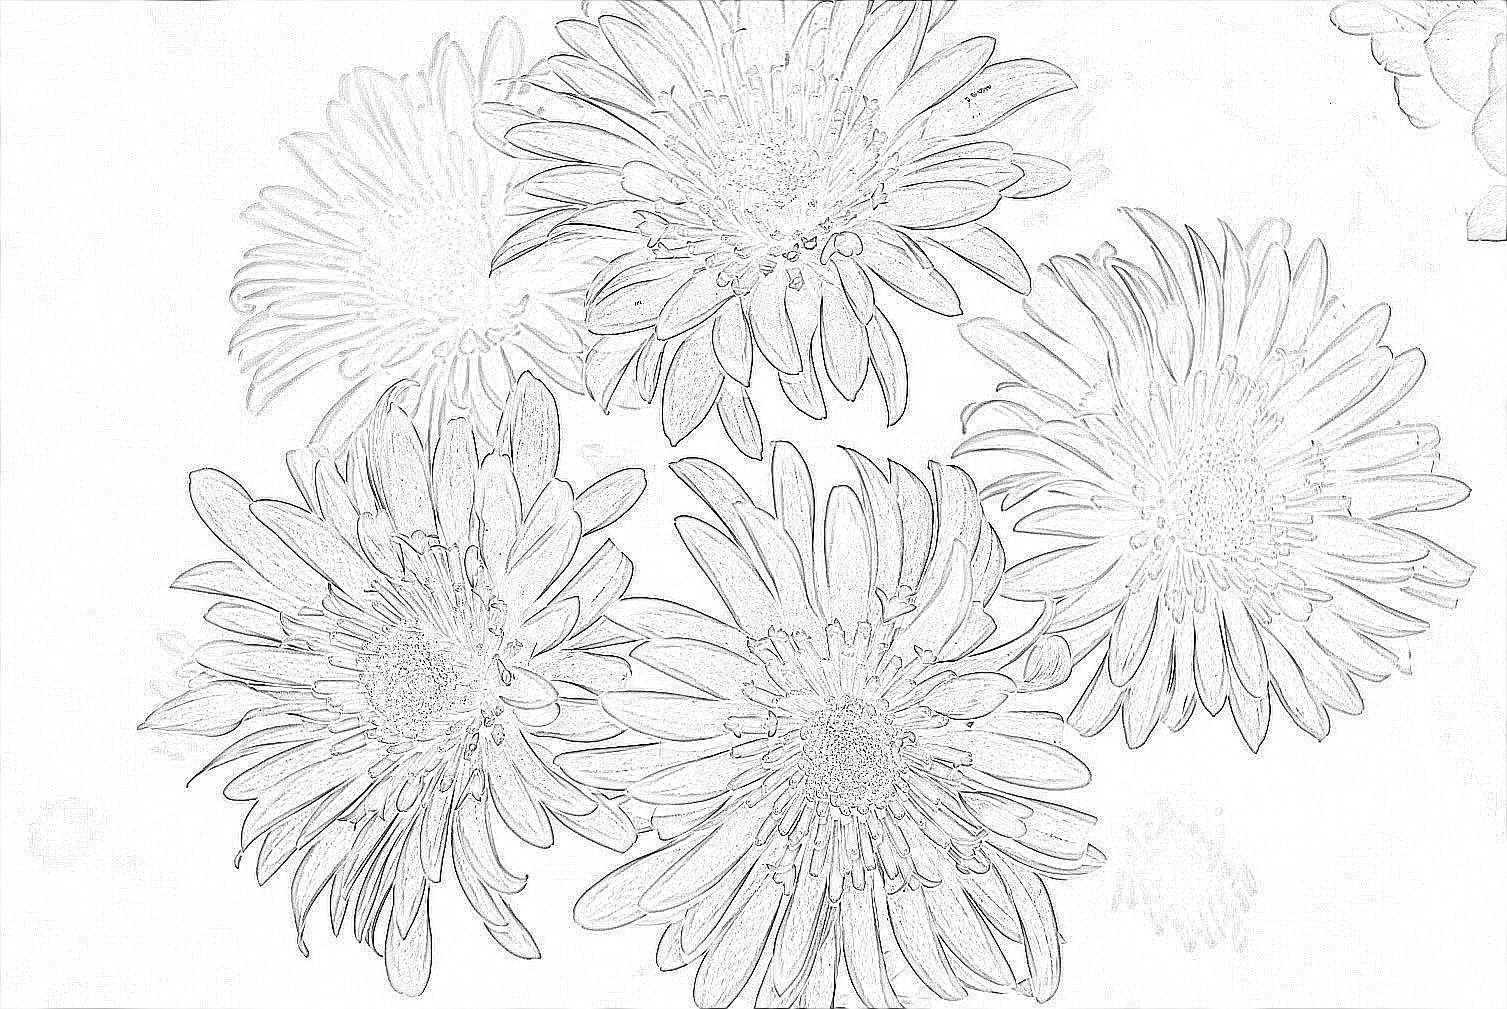

In [49]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFilter
# read image and convert to RGB
image=Image.open("12.jpg")
image=image.convert('RGB')

gray_image = image.convert('L')

edge_image = gray_image.filter(ImageFilter.FIND_EDGES)

#lambda function
inverted_image = edge_image.point(lambda p: 255 - p)

display(inverted_image)


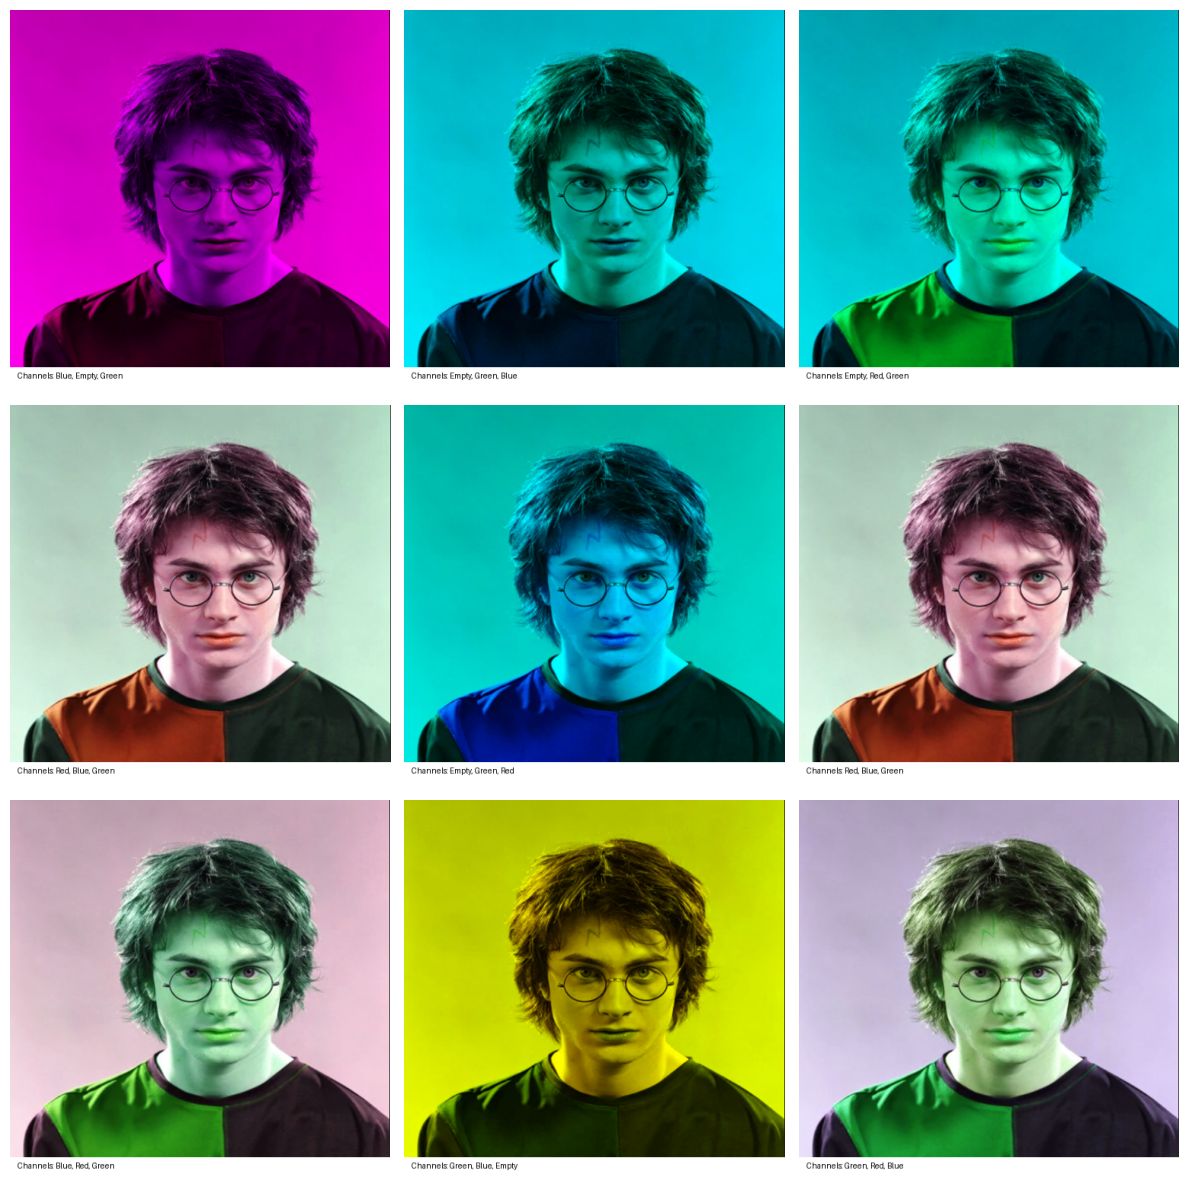

In [57]:
from PIL import Image, ImageDraw, ImageOps
import random
import matplotlib.pyplot as plt
import numpy as np

# this function for split, shuffle, and merge images
def shuffle_channels(image):
    # Converting image to RGB if it is not
    image = image.convert("RGB")
    
    # Split the channels to "r, g, b"
    r, g, b = image.split()
    
    # Create an empty (black) channel
    empty_channel = Image.new('L', image.size, 0)
    
    # List of channels including the empty one
    channels = [r, g, b, empty_channel]
    
    # Randomly select three channels (channels may repeat)
    shuffled_indices = random.sample([0, 1, 2, 3], 3)  # List of indices [0: Red, 1: Green, 2: Blue, 3: Empty]
    shuffled_channels = [channels[i] for i in shuffled_indices]
    
    # Merge the selected channels into a new image
    new_image = Image.merge("RGB", shuffled_channels)
    
    # Return the shuffled indices and the image
    return shuffled_indices, new_image

# Function to add a caption to the image indicating channel order
def add_caption(image, shuffled_indices, channel_names):
    draw = ImageDraw.Draw(image)
    
    # Draw a white rectangle at the bottom for the caption
    draw.rectangle([0, image.height - 30, image.width, image.height], fill="white")
    
    # Create the text to label the channels based on their indices
    channel_labels = [channel_names[i] for i in shuffled_indices]
    label = "Channels: " + ", ".join(channel_labels)
    
    # Add text to the rectangle (adjust position as needed)
    draw.text((10, image.height - 25), label, fill="black")
    
    return image

# Open the image and resize to 500x500
image = Image.open('Harry.png')
image = image.resize((500, 500))

# Create a 3x3 grid for the final poster
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Possible channel labels
channel_names = ['Red', 'Green', 'Blue', 'Empty']

for i in range(3):
    for j in range(3):
        # Shuffle the channels and get a new image
        shuffled_indices, new_image = shuffle_channels(image)
        
        # Add the caption to the image
        labeled_image = add_caption(new_image, shuffled_indices, channel_names)
        
        # Display the image in the 3x3 grid
        axes[i, j].imshow(np.asarray(labeled_image))
        axes[i, j].axis('off')

# Adjust layout and show the poster
plt.tight_layout()
plt.show()

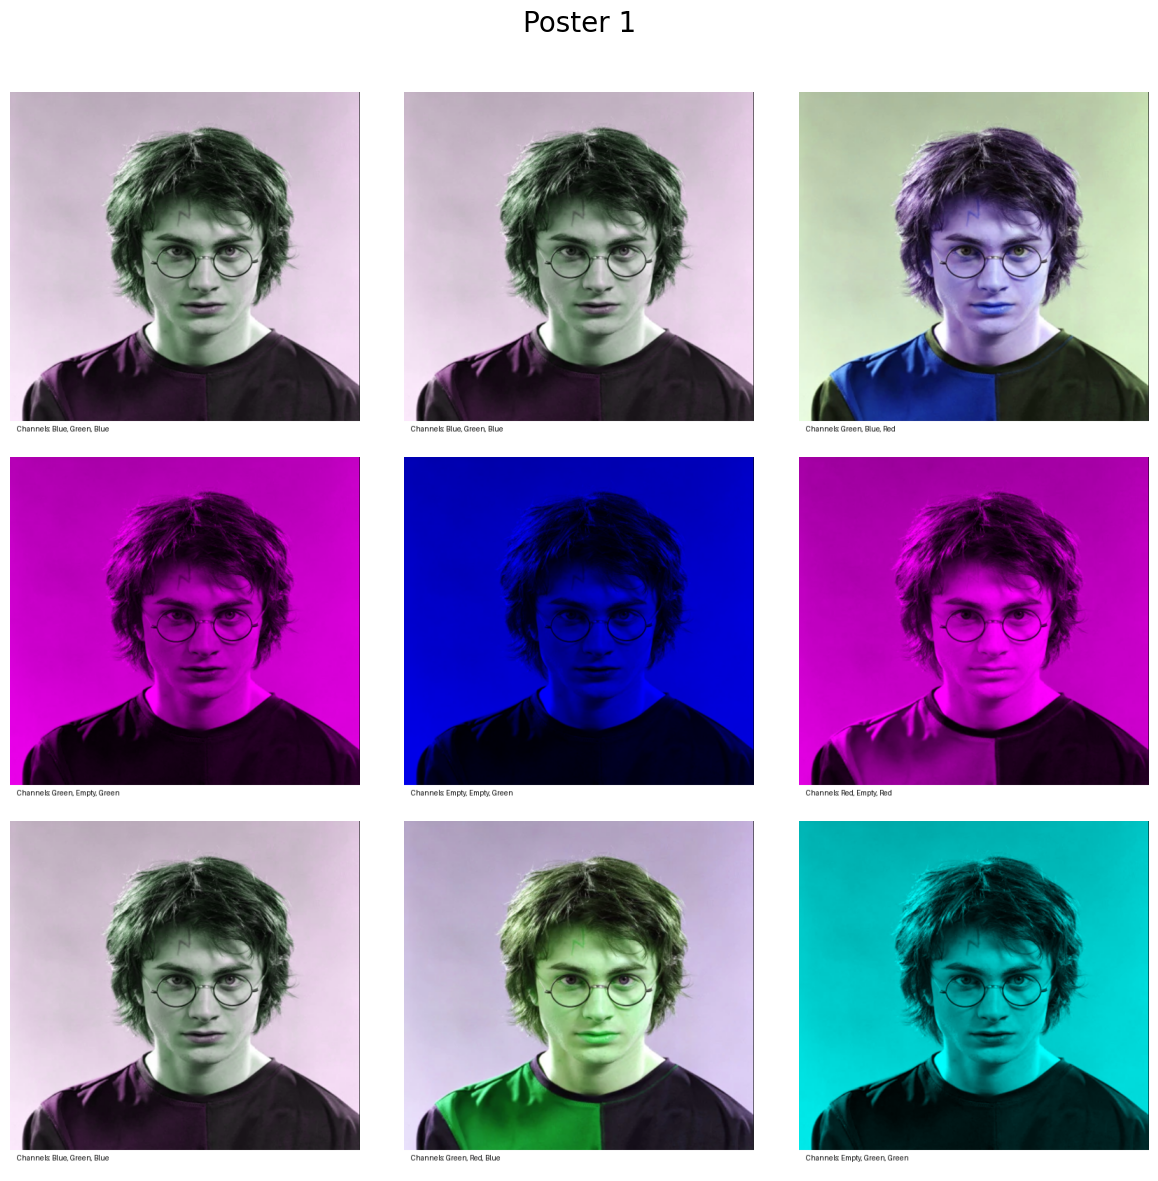

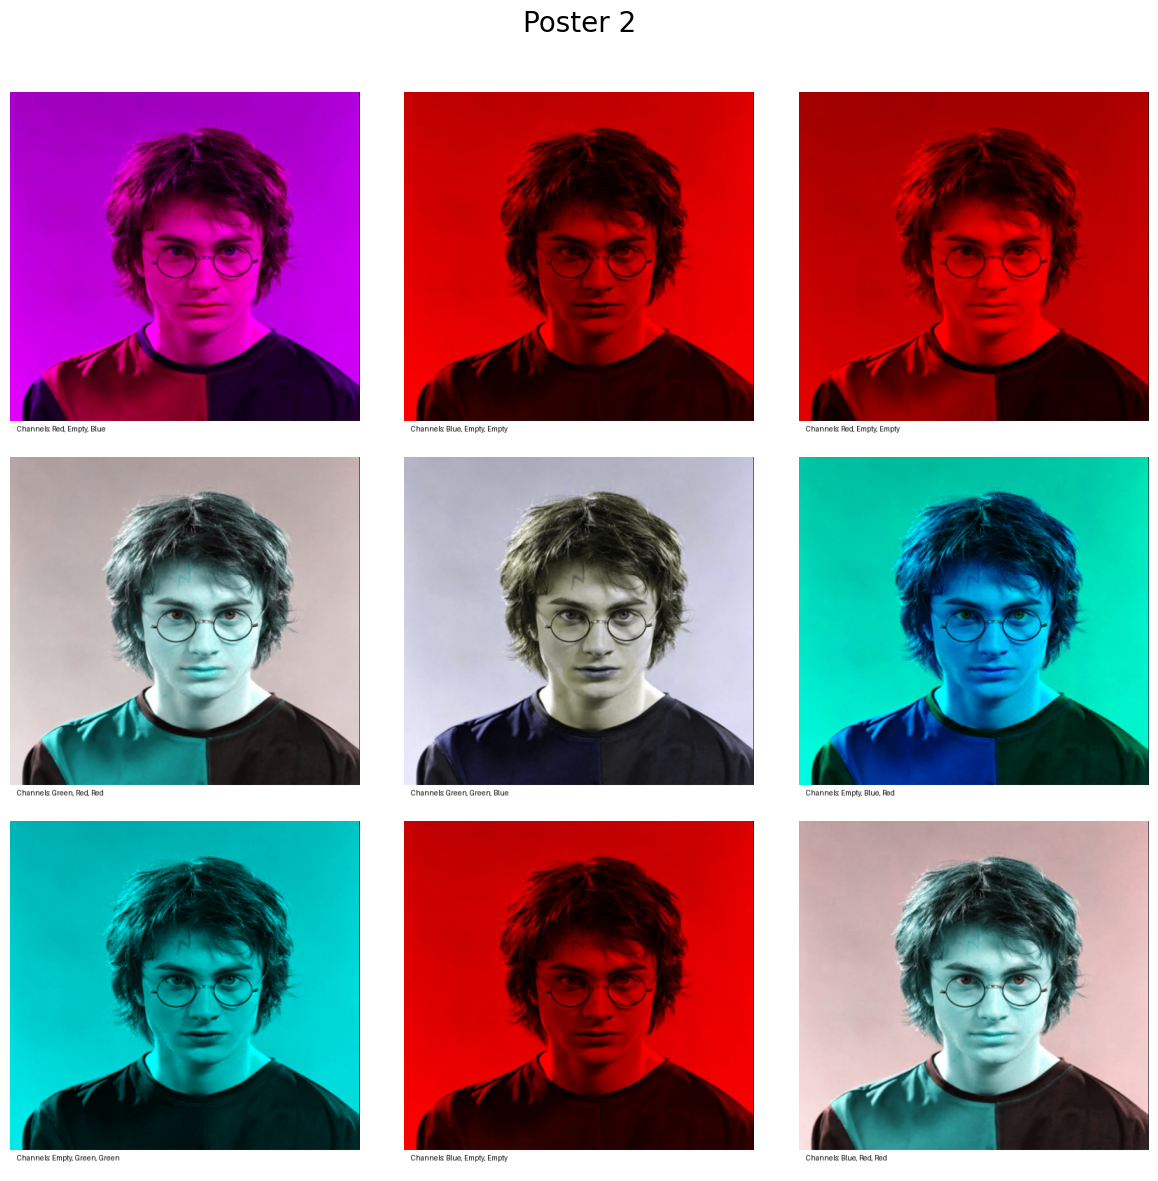

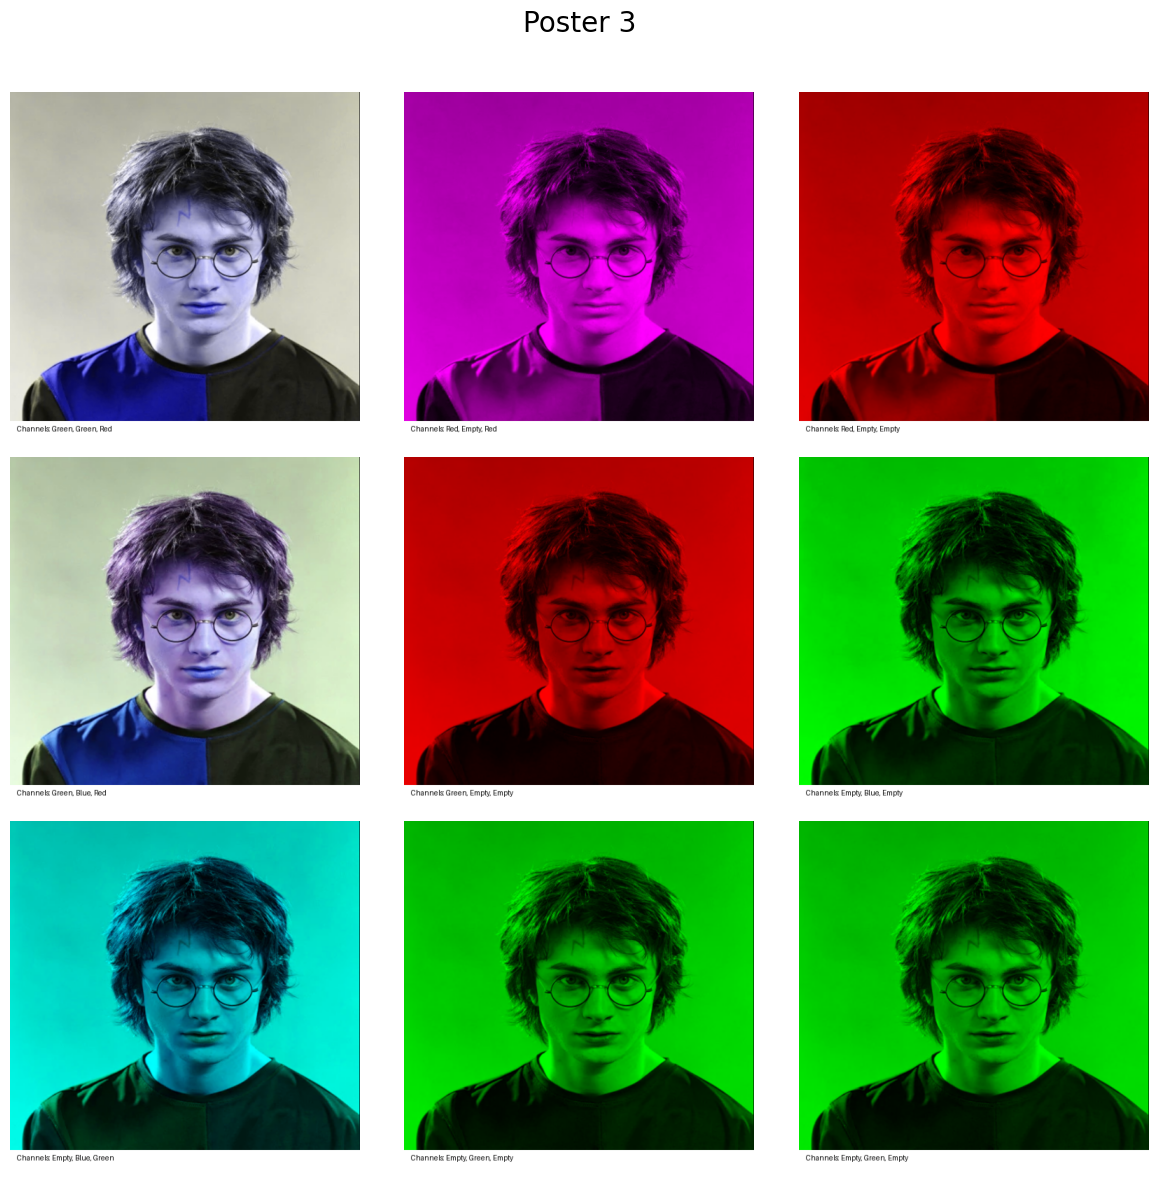

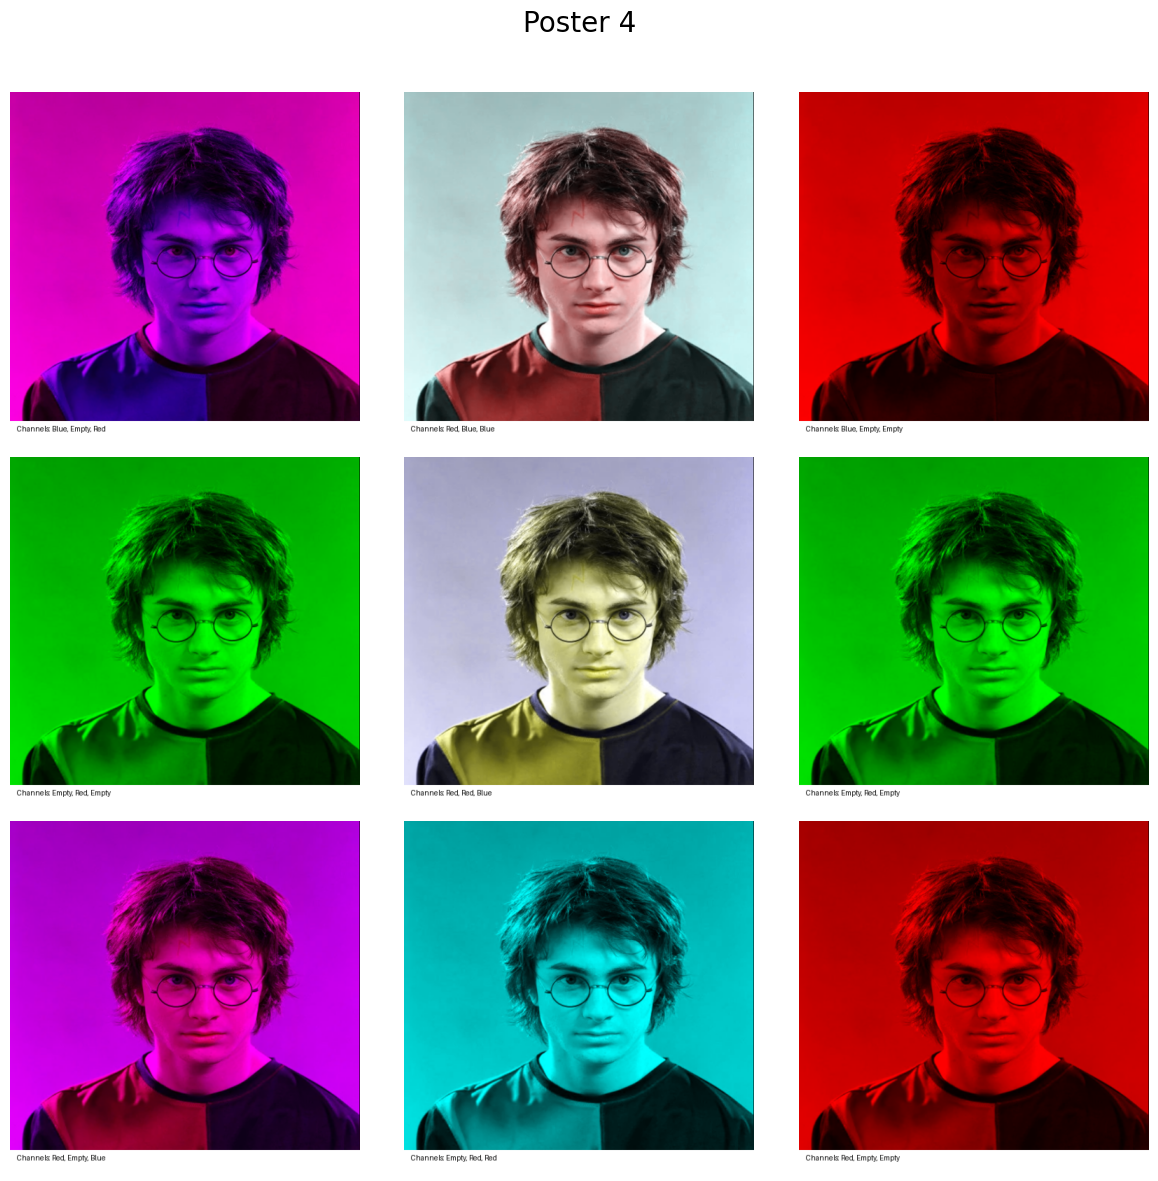

In [2]:
from PIL import Image, ImageDraw, ImageOps
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to split, shuffle, and merge image channels
def shuffle_channels(image):
    # Convert image to RGB if it's not
    image = image.convert("RGB")
    
    # Split the channels
    r, g, b = image.split()
    
    # Create an empty (black) channel
    empty_channel = Image.new('L', image.size, 0)
    
    # List of channels including the empty one
    channels = [r, g, b, empty_channel]
    
    # Randomly select three channels (channels may repeat)
    shuffled_indices = random.choices([0, 1, 2, 3], k=3)  # Randomly pick 3 channels
    shuffled_channels = [channels[i] for i in shuffled_indices]
    
    # Merge the selected channels into a new image
    new_image = Image.merge("RGB", shuffled_channels)
    
    # Return the shuffled indices and the image
    return shuffled_indices, new_image

# Function to add a caption to the image indicating channel order
def add_caption(image, shuffled_indices, channel_names):
    draw = ImageDraw.Draw(image)
    
    # Draw a white rectangle at the bottom for the caption
    draw.rectangle([0, image.height - 30, image.width, image.height], fill="white")
    
    # Create the text to label the channels based on their indices
    channel_labels = [channel_names[i] for i in shuffled_indices]
    label = "Channels: " + ", ".join(channel_labels)
    
    # Add text to the rectangle (adjust position as needed)
    draw.text((10, image.height - 25), label, fill="black")
    
    return image

# Open the image and resize to 500x500
image = Image.open('Harry.png')
image = image.resize((500, 500))

# Possible channel labels
channel_names = ['Red', 'Green', 'Blue', 'Empty']

# Number of posters to generate
num_posters = 4

for poster_num in range(num_posters):
    # Create a 3x3 grid for each poster
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle(f'Poster {poster_num + 1}', fontsize=20)

    for i in range(3):
        for j in range(3):
            # Shuffle the channels and get a new image
            shuffled_indices, new_image = shuffle_channels(image)

            # Add the caption to the image
            labeled_image = add_caption(new_image, shuffled_indices, channel_names)

            # Display the image in the 3x3 grid
            axes[i, j].imshow(np.asarray(labeled_image))
            axes[i, j].axis('off')

    # Adjust layout and show the poster
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()